# Simulations of the semi-discrete prey-predator models

In [3]:
#Dependancies
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## 1. Model without interaction

### 1.1 Only continuous model

In [4]:
#Definition of the continuous model
def cont_model(
    x0y0: list,
    r: float = 0.5,
    K: float = 10,
    a: float = 20,
    c: float = 20,
    m: float = 0.5,
    gamma: float = 0.8,
) -> list:
    
    '''This model describes the evolution of a pest population x and a predator population y
    
    Param:
        x0y0: a list of initial values [x0, y0]
        r: growth rate
        K: carrying capacity
        a: search rate
        c: half-saturation constant
        m: death rate
        gamma: conversion factor
        
    Return:
        xy: a list of the two population size of x and y'''
    
    #Initialisation
    x = x0y0[0]
    y = x0y0[1]

    #Equations of the derivative of x and y
    dx = r*x * (1 - x/K) - a*x*(c + x) * y
    dy = gamma * a*x*(c + x) * y - m*y

    return dx, dy

In [13]:
#Simulations

##Initialisation
x0y0 = [2, 1]

##Time points
t = np.linspace(0,20,1000)


In [14]:
#Solve ODE
cont_xy = odeint(cont_model, x0y0, t)

The warning above might be due to the fact that it is not semi-discrete. The models behavior may be impacted to the fact that there is no discrete part. That is what we are going to check. But to remember, this part about the continuous model is just to be sure that everything works. We start with something simple befode something complicated.

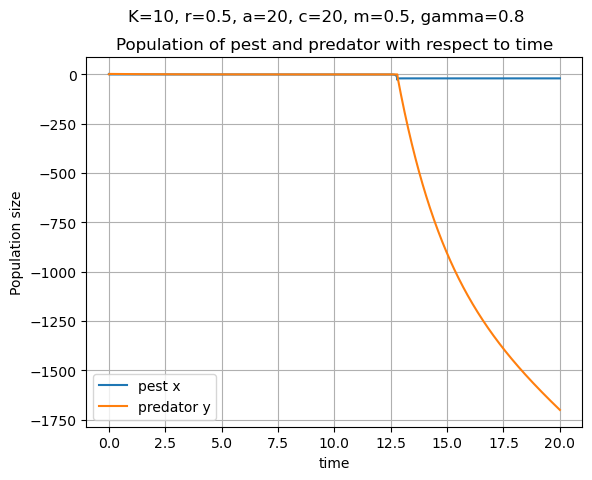

In [15]:
#Plot results
plt.plot(t, cont_xy.T[0], label = 'pest x')
plt.plot(t, cont_xy.T[1], label = 'predator y')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time')
plt.suptitle('K=10, r=0.5, a=20, c=20, m=0.5, gamma=0.8')
plt.legend()
plt.grid()
plt.show()

Indeed, the behaviour of the graph is strange, reaching high absolute values, even negative. But we were prepared from strange behaviour because there is no discrete part. Now, we can focus on adding a discrete part.

### 1.2 Semi-discrete model